In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv("Damaged Vehicle.csv")

In [4]:
df

,Unnamed: 0,Unit Type,Speed,Speed Tol,Status,Smoke Duration,Health %,Health Color
0,0,Devastator,0.472222,0.027778,Intact,NaN,100,Green
1,1,Devastator,0.308148,0.011852,Smoking,26.0,40,Yellow
2,2,Quad,1.200000,0.200000,Intact,NaN,100,Green
3,3,Quad,1.166667,0.166667,Damaged,25.0,15,Red
4,4,Trike,1.666667,0.333333,Intact,NaN,100,Green
5,5,Trike,1.166667,0.166667,Smoking,36.0,20,Red
6,6,Siege Tank,0.574359,0.041026,Intact,NaN,100,Green
7,7,Siege Tank,0.535714,0.035714,Smoking,26.0,30,Red
8,8,Combat Tank H,1.012500,0.112500,Intact,NaN,100,Green
9,9,Combat Tank H,0.696429,0.053571,Smoking,16.0,30,Yellow


In [5]:
all_unit_types = set(df["Unit Type"])

In [6]:
def compute_ratio(a, da, b, db):
    divider = b * b - db * db
    term1 = a * b
    term2 = a * db + b * da + da * db
    return term1 / divider, term2 / divider

In [15]:
def color_mapper(color):
    if color == "Yellow":
        return "gold"
    if color == "Green":
        return "springgreen"
    return "tomato"

In [16]:
df.columns

Index(['Unnamed: 0', 'Unit Type', 'Speed', 'Speed Tol', 'Status',
       'Smoke Duration', 'Health %', 'Health Color'],
      dtype='object')

In [17]:
ratio_df = pd.DataFrame(
    columns = ["Speed", "Unit Type", "Health %", "HBar Color", 
               "Ratio", "Ratio Err"]
)

for unit_type in all_unit_types:
    subset = df[df["Unit Type"] == unit_type]
    
    speeds = subset["Speed"]
    speed_tols = subset["Speed Tol"]
    
    i = speeds.argmax()
    
    for j, (speed, speed_tol) in enumerate(zip(speeds, speed_tols)):
        ratio, ratio_err = compute_ratio(
            speed, speed_tol, speeds.iloc[i], speed_tols.iloc[i])
        
        ratio_df = ratio_df.append(
            {
                "Speed": speeds.iloc[i],
                "Unit Type": unit_type,
                "Health %": subset.iloc[j]["Health %"], 
                "HBar Color": color_mapper(
                    subset.iloc[j]["Health Color"]),
                "Ratio": ratio, 
                "Ratio Err": ratio_err
            },
            ignore_index=True
        )

In [18]:
ratio_df = ratio_df.sort_values(["Speed", "Unit Type", "Health %"])
ratio_df;

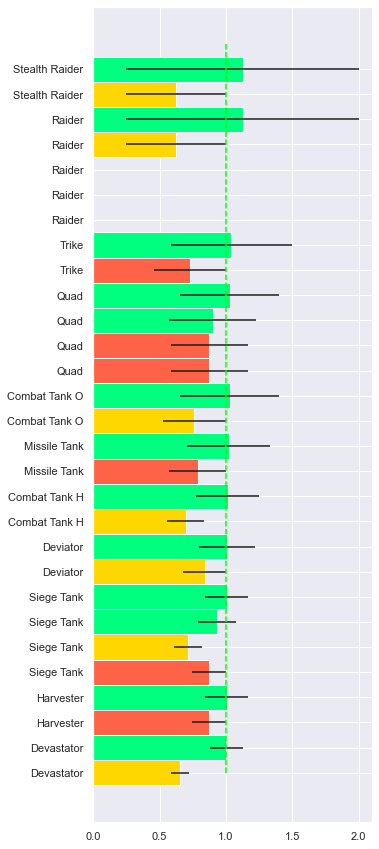

In [22]:
plot.figure(figsize=(5, 15))

plot.barh(range(len(ratio_df)),
          ratio_df["Ratio"],
          height=1.0,
          color=ratio_df["HBar Color"],
          xerr=ratio_df["Ratio Err"])
plot.plot([1.0, 1.0], [0.0, len(ratio_df)], "--", c="lime",)
plot.yticks(range(len(ratio_df)), ratio_df["Unit Type"]);

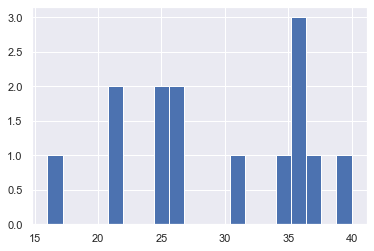

In [27]:
plot.hist(df["Smoke Duration"], bins=20);

In [23]:
len(ratio_df)

29